In [ ]:
#Erin and Qhaisara

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv ("liver_disease.csv")

In [ ]:
print(df)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  \
0     65  Female   0.7  0.1      187    16    18  6.8  3.3       0.90   
1     62    Male  10.9  5.5      699    64   100  7.5  3.2       0.74   
2     62    Male   7.3  4.1      490    60    68  7.0  3.3       0.89   
3     58    Male   1.0  0.4      182    14    20  6.8  3.4       1.00   
4     72    Male   3.9  2.0      195    27    59  7.3  2.4       0.40   
..   ...     ...   ...  ...      ...   ...   ...  ...  ...        ...   
578   60    Male   0.5  0.1      500    20    34  5.9  1.6       0.37   
579   40    Male   0.6  0.1       98    35    31  6.0  3.2       1.10   
580   52    Male   0.8  0.2      245    48    49  6.4  3.2       1.00   
581   31    Male   1.3  0.5      184    29    32  6.8  3.4       1.00   
582   38    Male   1.0  0.3      216    21    24  7.3  4.4       1.50   

     Selector  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
578        

In [ ]:
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 2})
df['Selector'] = df['Selector'].replace({1: 0, 2: 1})

In [ ]:
print(df)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  \
0     65       2   0.7  0.1      187    16    18  6.8  3.3       0.90   
1     62       1  10.9  5.5      699    64   100  7.5  3.2       0.74   
2     62       1   7.3  4.1      490    60    68  7.0  3.3       0.89   
3     58       1   1.0  0.4      182    14    20  6.8  3.4       1.00   
4     72       1   3.9  2.0      195    27    59  7.3  2.4       0.40   
..   ...     ...   ...  ...      ...   ...   ...  ...  ...        ...   
578   60       1   0.5  0.1      500    20    34  5.9  1.6       0.37   
579   40       1   0.6  0.1       98    35    31  6.0  3.2       1.10   
580   52       1   0.8  0.2      245    48    49  6.4  3.2       1.00   
581   31       1   1.3  0.5      184    29    32  6.8  3.4       1.00   
582   38       1   1.0  0.3      216    21    24  7.3  4.4       1.50   

     Selector  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
578        

In [ ]:
print(df.groupby('Selector').size())

Selector
0    416
1    167
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    int64  
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [ ]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y = df.Selector.values #target
x = df.drop(['Selector'], axis = 1) #input

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)

acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 70.29%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 61.14%


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 19, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 68.00%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train, y_train)

acc = knn.score(x_test,y_test)*100
accuracies['KNN'] = acc

print('Accuracy of K-NN classifier on test set: {:.2f}%'.format(acc))

Accuracy of K-NN classifier on test set: 66.29%


<ipython-input-16-af657dd5065c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


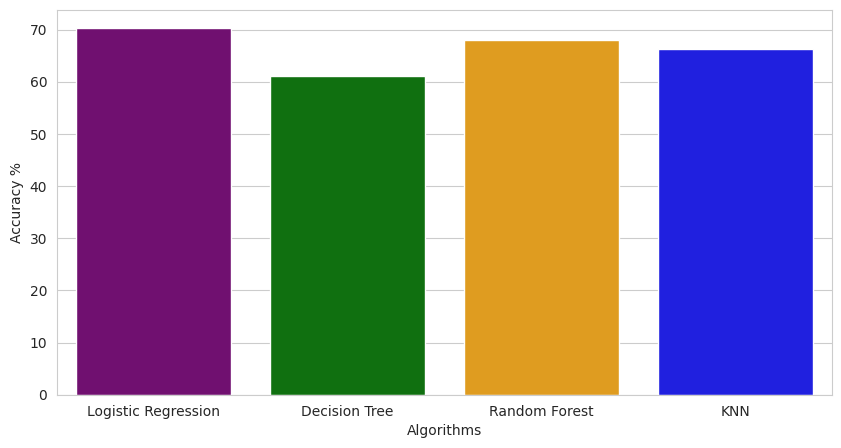

In [ ]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)
y_head_knn = knn.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_knn = confusion_matrix(y_test,y_head_knn)

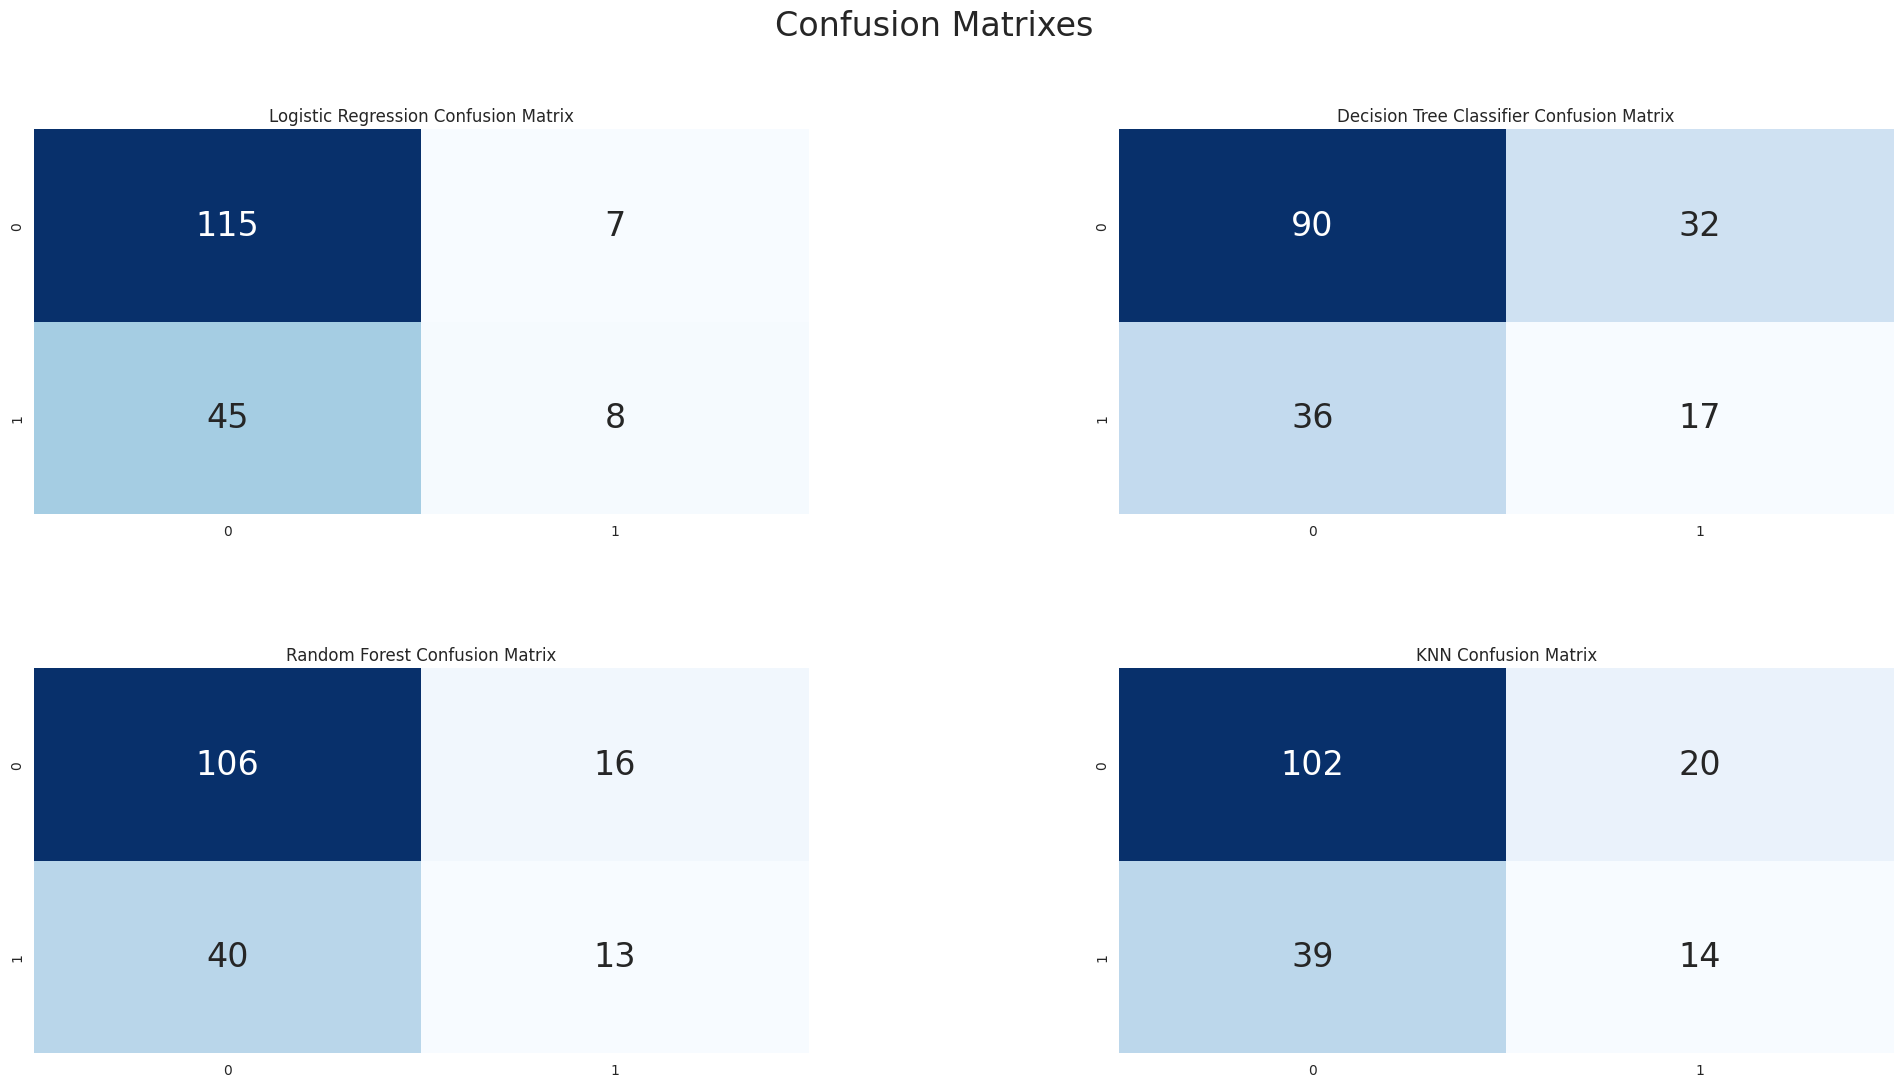

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()